### SVM 支持向量机

In [29]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [42]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

'''
:Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
'''

iris = load_iris()
X = iris['data'][:,[2,3]]
y = iris['target']

# setosa_or_versicolor = (y==0)|(y==1)
setosa_or_versicolor = (y!=2)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(C=float('inf'), kernel='linear')
svm_clf.fit(X,y)
X.shape

(100, 2)

In [46]:
def plot_iris():
    plt.plot(X[y==1,0], X[y==1,1], 'b^')
    plt.plot(X[y==0,0], X[y==0,1], 'yo')
    # plt.axis([0,5.5,0,2])
    plt.xlabel('petal length')
    plt.ylabel('petal width')

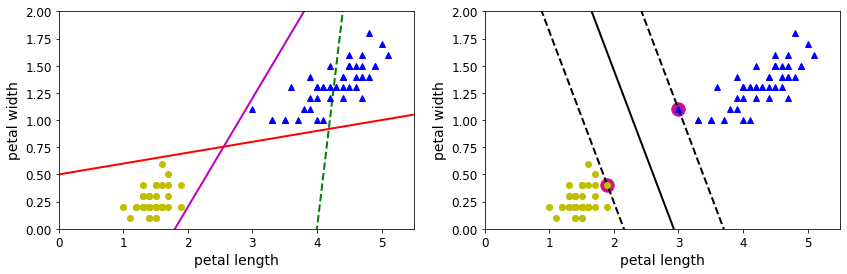

In [40]:
# 一般的模型
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    '''
    决策面方程: WX + b = 0
    决策面方程(若是有两个特征的样本): w0x0+w1x1+b=0 ==> x1 = -w0x0/w1 - b/w1
    '''
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]*x0/w[1] - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#C71585')
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x0, pred_1, 'g--', linewidth=2)
plt.plot(x0, pred_2, 'm-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)
plot_iris()

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5, sv=True)
plot_iris()

<img src='img/721.png'>
<img src='img/722.jpg'>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1))])

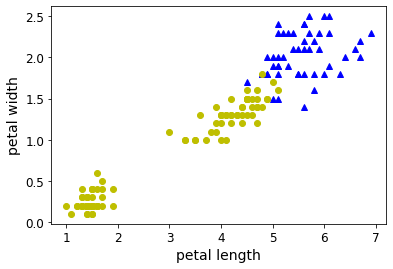

In [50]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data'][:,[2,3]]
y = (iris['target']==2).astype(np.float32)

plot_iris()

svm_clf = make_pipeline(
                        StandardScaler(),
                        LinearSVC(C=1)
                        )
svm_clf.fit(X,y)

### 对比不同的C值所带来的效果差异

#### 标准化后的数据进行还原
<img src='img/723.jpg'>
<img src='img/724.jpg'>


<img src='img/725.jpg'>
<img src='img/726.jpg'>
<img src='img/727.jpg'>
<img src='img/728.jpg'>
